# AVIATION RISK ANALYSIS PROJECT

This notebook analyzes aviation incident data to determine patterns in accidents across U.S. states and the yearsthey occured. The goal is to provide recommendations for risk reduction and informed investment in aviation operations.


## 1. Import Required Libraries

We start by importing `pandas` for data manipulation and `matplotlib.pyplot` for visualization

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load and Preview the Data

We load the aviation incident dataset and the U.S. state codes file.This are our sources of data.
Data SourcesSets:
- AviationData.csv
- USState_Codes.csv

In [33]:
#Load AviationData.csv
aviation_df = pd.read_csv("AviationData.csv", encoding='latin-1')

#Load USState_Codes.csv
state_codes_df = pd.read_csv("USState_Codes.csv")

#Preview the data
print(aviation_df.head())
print(state_codes_df.head())

C:\Users\knavr\AppData\Local\Temp\ipykernel_27636\103048040.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv("AviationData.csv", encoding='latin-1')


         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

## 3. Clean the Aviation Data and Merge the data sets

We remove the rows with missing data and extract the U.S. state abbreviation from the Location column.


In [34]:
#Clean the Aviation Data
#rows with missing values in key columns
aviation_df_cleaned = aviation_df.dropna(subset=['Location', 'Event.Date'])

aviation_df_cleaned['State'] = aviation_df_cleaned['Location'].str.extract(r',\s*([A-Z]{2})')

#Merge with State Codes
merged_df = pd.merge(aviation_df_cleaned, state_codes_df, left_on='State', right_on='Abbreviation', how='left')
print(merged_df[['Location', 'State']].head())

#Save the merged data
merged_df.to_csv("Cleaned_AviationData.csv", index=False)

C:\Users\knavr\AppData\Local\Temp\ipykernel_27636\2819489917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df_cleaned['State'] = aviation_df_cleaned['Location'].str.extract(r',\s*([A-Z]{2})')


          Location State
0  MOOSE CREEK, ID    ID
1   BRIDGEPORT, CA    CA
2    Saltville, VA    VA
3       EUREKA, CA    CA
4       Canton, OH    OH


## 4. Analyze Incidents Per State

We calculate and display the number of incidents recorded in each U.S. state, to get an idea on the top states in terms of where the incidents were recorded and if the data has been properly merged.


In [35]:
# Incidents per State
incidents_per_state = merged_df['State'].value_counts().sort_values(ascending=False)
print("Top States by Incidents:")
print(incidents_per_state.head(10))

Top States by Incidents:
State
CA    8910
TX    5913
FL    5825
AK    5672
AZ    2834
CO    2760
WA    2614
IL    2060
MI    2030
GA    2024
Name: count, dtype: int64


## 5. Visualize Incidents Per State

We create a bar chart to visualize the number of aviation incidents by U.S. state.
We also create a bar chat for the top states for clear visibility and emphasis.
The above graphs will help us spot a trend and or make recommendations.


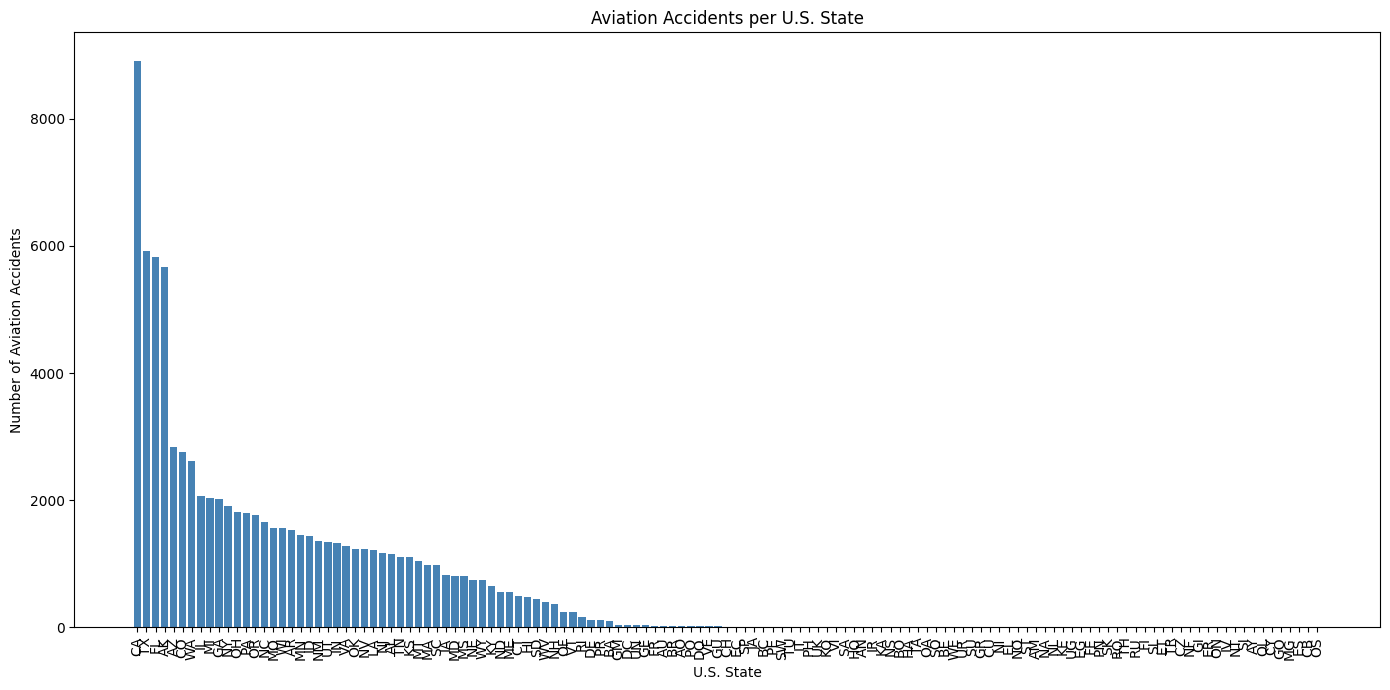

In [36]:
#visualize incidents per state
plt.figure(figsize=(14, 7))
plt.bar(incidents_per_state.index, incidents_per_state.values, color='steelblue')

plt.xlabel("U.S. State")
plt.ylabel("Number of Aviation Accidents")
plt.title("Aviation Accidents per U.S. State")
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()

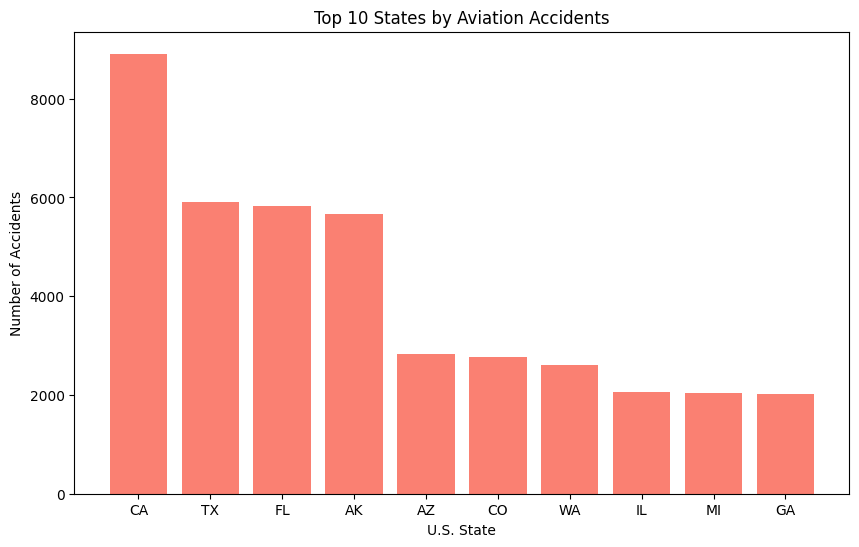

In [37]:
#top 10 states
top_states = incidents_per_state.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_states.index, top_states.values, color='salmon')
plt.xlabel("U.S. State")
plt.ylabel("Number of Accidents")
plt.title("Top 10 States by Aviation Accidents")
plt.show()

## 6. Analyze Incidents Per Year

We convert the "Event.Date" column to a datetime format, extract the year, and then analyze trends in incident counts over time. This will enable us to analyze the data in regards to the year the incidents were recorded.

In [38]:
#Incidents by Year
merged_df['Event.Date'] = pd.to_datetime(merged_df['Event.Date'])
merged_df['Year'] = merged_df['Event.Date'].dt.year

#Count incidents by year
yearly_counts = merged_df['Year'].value_counts().sort_index()

## 7. Visualize Incidents Per Year

We create a bar chart to visualize the number of aviation incidents by year they were recorded.
This will help us see a trend in respect to years of aviation incidents and offer a recommendation.

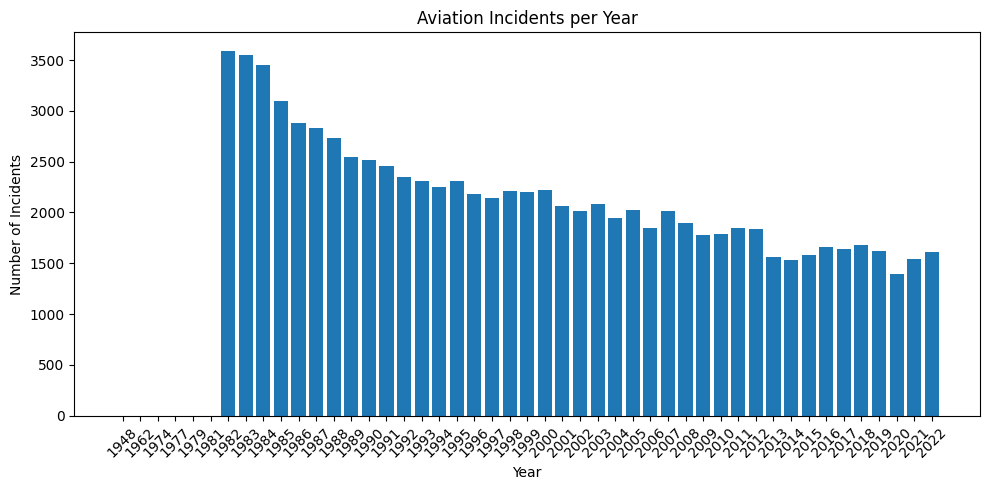

In [39]:
plt.figure(figsize=(10, 5))
plt.bar(yearly_counts.index.astype(str), yearly_counts.values)
plt.title("Aviation Incidents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

This analysis provided an overview of aviation incident patterns by U.S. state and over time. The visualizations offer insights into which states and years had the most reported incidents. These findings can help inform strategic safety efforts and risk management in the aviation sector.